In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
import os
from os.path import normpath
from pathlib import PureWindowsPath
import numpy as np


def convert(path):
    return PureWindowsPath(normpath(PureWindowsPath(path).as_posix())).as_posix()


chemin_du_fichier = convert(r"..\winogrande_1.1\train_xl.jsonl")
df = pd.read_json(chemin_du_fichier , lines=True)
print(df.head())

l_option1 = list(df["option1"])
l_option2 = list(df["option2"])



def frequency1(l):
    counter = Counter(l)
    # Trie les mots par fréquence décroissante
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    sorted_words = [[word, freq] for word, freq in sorted_words]
    for i in range(len(sorted_words)):
        sorted_words[i][1] /= 2

    return sorted_words

def frequency2(l):
    counter = Counter(l)
    # Trie les mots par fréquence décroissante
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    sorted_words = [[word, freq] for word, freq in sorted_words]

    return sorted_words

def frequency3(l):
    counter = Counter(l)
    # Trie les mots par fréquence décroissante
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    
    sorted_words = [[word, freq] for word, freq in sorted_words]
    unsorted_words = {word:freq for word, freq in sorted_words}
    return sorted_words, unsorted_words

words_and_occurences_sorted_option1 = frequency1(l_option1)
#common_words_and_occurences_sorted_option1
words_and_occurences_sorted_option2 = frequency1(l_option2)

# def common_words_only(l_sorted_occurences):
#     for line in l_sorted_occurences:
#         if line

                                qID  \
0  3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2   
1  3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1   
2  3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1   
3  3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2   
4  3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2   

                                            sentence option1 option2  answer  
0  Ian volunteered to eat Dennis's menudo after a...     Ian  Dennis       2  
1  Ian volunteered to eat Dennis's menudo after a...     Ian  Dennis       1  
2  He never comes to my home, but I always go to ...    home   house       1  
3  He never comes to my home, but I always go to ...    home   house       2  
4  Kyle doesn't wear leg warmers to bed, while Lo...    Kyle   Logan       2  


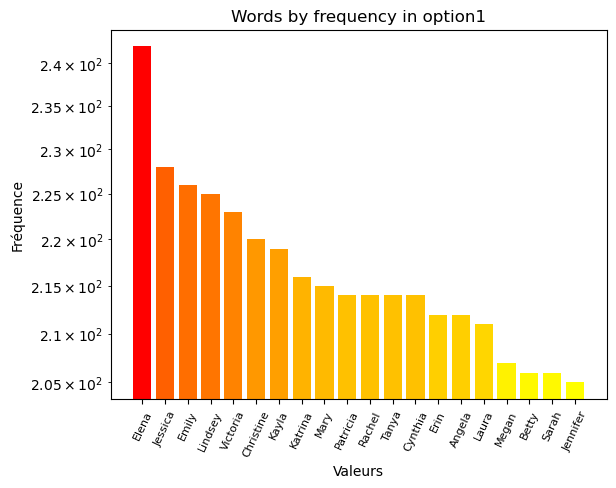

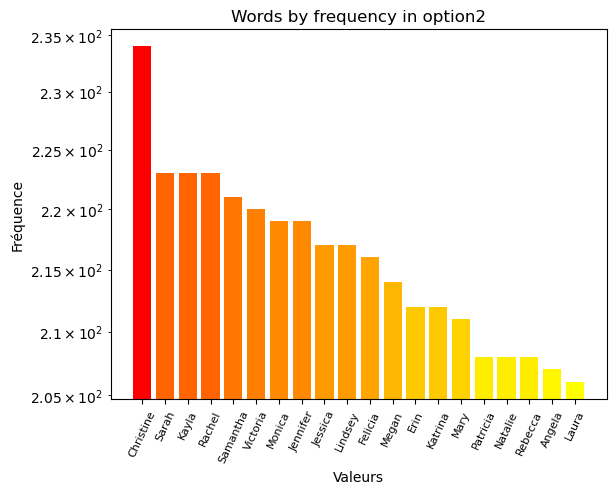

In [72]:
from matplotlib import colors

def frequency_plot(x,y,plot_name):
# Créer un colormap allant du rouge au bleu
    cmap = colors.LinearSegmentedColormap.from_list("red_to_blue", ["yellow", "red"])

# Normaliser les fréquences entre 0 et 1 pour les appliquer au colormap
    norm = plt.Normalize(min(y), max(y))

# Créer une figure et un axe
    fig, ax = plt.subplots()

# Dessiner l'histogramme avec un dégradé de couleur
    for i in range(len(x)):
        ax.bar(x[i], y[i], width=0.8, color=cmap(norm(y[i])), align='center')

    ax.set_yscale('log')
# Titres et labels
    plt.title(plot_name)
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=65) 
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.show()


plot_name = "Words by frequency in option1"
x1 = [row[0] for row in words_and_occurences_sorted_option1]
y1 = [row[1] for row in words_and_occurences_sorted_option1]
frequency_plot(x1[:20],y1[:20],plot_name)

plot_name = "Words by frequency in option2"
x2 = [row[0] for row in words_and_occurences_sorted_option2]
y2 = [row[1] for row in words_and_occurences_sorted_option2]
frequency_plot(x2[:20],y2[:20],plot_name)



In [10]:
ratio1 = len(words_and_occurences_sorted_option1) / (len(l_option1) * 2)

print(ratio1)



0.04060844596267142


C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\1118817364.py:6: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-lambda_ * x) + 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\1118817364.py:6: RuntimeWarning: overflow encountered in multiply
  return A * np.exp(-lambda_ * x) + 1


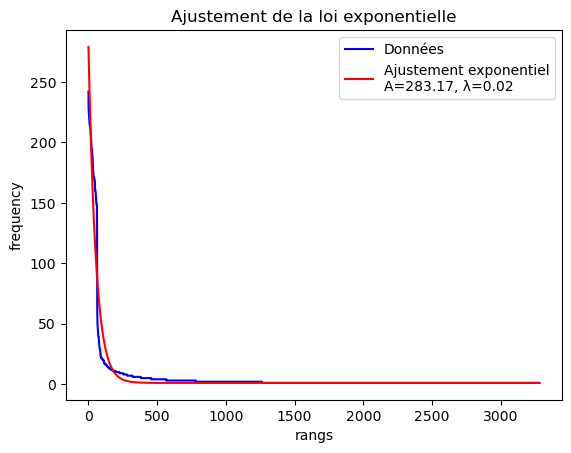

R² : 0.9381
Paramètre estimé A : 283.17
Paramètre estimé lambda : 0.02


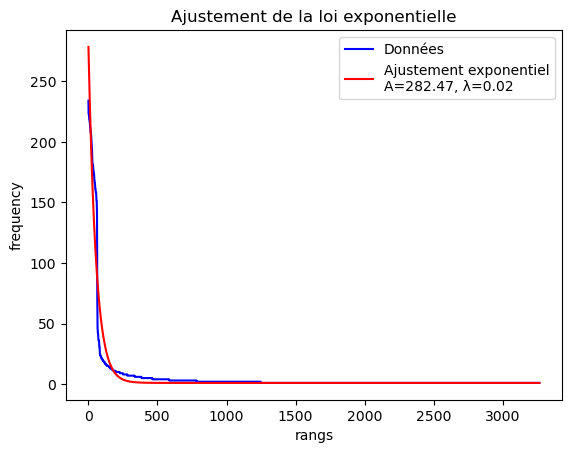

R² : 0.9356
Paramètre estimé A : 282.47
Paramètre estimé lambda : 0.02


In [11]:
from scipy.optimize import curve_fit


# Définir la fonction exponentielle pour l'ajustement
def exp_func(x, A, lambda_):
    return A * np.exp(-lambda_ * x) + 1

def exp_model_and_plot(x_values,y_values):
    # Ajuster la fonction exponentielle aux données
    rangs = np.arange(1, len(x_values) + 1)
    params, covariance = curve_fit(exp_func, rangs, y_values, p0=[1, 0.1])

# Extraire les paramètres ajustés A et lambda
    A_estime = 8
    A_estime, lambda_estime = params
    

# Générer les valeurs ajustées
    x_fit = np.linspace(min(rangs), max(rangs), len(x_values))
    y_fit = exp_func(x_fit, *params)

# Visualiser les données et l'ajustement
    plt.plot(rangs, y_values, label="Données", color="blue")
    plt.plot(x_fit, y_fit, label=f"Ajustement exponentiel\nA={A_estime:.2f}, λ={lambda_estime:.2f}", color="red")
    plt.xlabel('rangs')
    plt.ylabel('frequency')
    plt.legend()
    plt.title('Ajustement de la loi exponentielle')
    plt.show()
    
    residus = y_values - y_fit

# Somme totale des carrés (variance des valeurs réelles autour de leur moyenne)
    SS_tot = np.sum((y_values - np.mean(y_values))**2)

# Somme des carrés des résidus
    SS_res = np.sum(residus**2)

# Coefficient de détermination R²
    R_squared = 1 - (SS_res / SS_tot)

# Affichage du résultat
    print(f"R² : {R_squared:.4f}")
    print(f"Paramètre estimé A : {A_estime:.2f}")
    print(f"Paramètre estimé lambda : {lambda_estime:.2f}")

exp_model_and_plot(x1,y1)
exp_model_and_plot(x2,y2)

In [12]:
def similarity_percentage(sent1, sent2):
    nb_common_words = 0
    sent1 = sent1.split()
    sent2 = sent2.split()
    
    for word in sent1 :
        if word in sent2:
            nb_common_words +=1
    ratio = nb_common_words / max(len(sent1), len(sent2))
    return ratio

x="c'est la raison de"
y="c'est la raison de"
similarity_percentage(x,y)



1.0

In [13]:
import spacy
from tqdm import tqdm

def cross_frequency(df):
    nlp = spacy.load("en_core_web_sm")
    pairs = []
    for index, row in tqdm(df.iterrows(),total = len(df)):
        if row.values[4] == 1:
            option = 2
        else:
            option = 3

        if nlp(row.values[option])[0].pos_ == 'PROPN':
            for word in row.values[1].split():
                pairs += [(row.values[option],word)]
        else:
            for word in row.values[1].split():
                pairs += [(row.values[option],word)]
    return frequency2(pairs)
    
# cross_frequency(df)


def link_with_adj(df):
    adj_pairs = []
    pairs = cross_frequency(df)
    nlp = spacy.load("en_core_web_sm")
    for pair in pairs:
        word_sentence = nlp(pair[0][1])
        if word_sentence[0].pos_ == "ADJ":
            adj_pairs += pair
            print(pair)
            
def link_with_verbs(df):
    adj_pairs = []
    pairs = cross_frequency(df)
    nlp = spacy.load("en_core_web_sm")
    for pair in pairs:
        word_sentence = nlp(pair[0][1])
        if word_sentence[0].pos_ == "VERB":
            adj_pairs += pair
            print(pair)

link_with_adj(df)


  1%|          | 349/40398 [00:02<04:39, 143.03it/s]


KeyboardInterrupt: 

# Compare the word distribution of the dataframe with a classic distribution

In [62]:
# Create a list of frequences for dt words
def frequency_list(df):
    tot_word_list = []
    for index, row in tqdm(df.iterrows(),total = len(df)):
        for word in row.values[1].split():
                if not (word == '_' or word[0].isupper()):
                    tot_word_list.append(word)
    return *frequency3(tot_word_list), len(tot_word_list)

frequency_list_df1, dict_frequency_list_df1, size_frequency_list_df1 = frequency_list(df)

100%|██████████| 40398/40398 [00:02<00:00, 15279.83it/s]


récupérer les 2 fréquences relatives : cacluler la diff normalisée par la fréquence du corpus de référécen
    on s'attend à une distribution en cloche
    
faire la méthode de vraissemblance que si la fréquence des mots (nb) est suffisament grande
plus le log est grand, plus
=> le seuil de fréquence minimal est de 5 => on ne calcule pas leurs valeurs

fonction de calcul de spécificité
TXM, i tramer, ...

In [80]:
# we import data from COCA :

# Charger le fichier Excel
df2 = pd.read_excel("wordFrequency.xlsx", sheet_name="4 forms (219k)")  # Remplace avec le vrai nom du fichier et de la feuille

# Sélectionner deux colonnes
frequency_list_df2 = df2[["word", "freq"]].values.tolist()
frequency_list_df2_rank = df2[["word", "rank"]].values.tolist()
size_frequency_list_df2 = 50033612/0.05

my_dict_coca = {key:value for key,value in frequency_list_df2 }
my_dict_coca2 = {key:value for key,value in frequency_list_df2_rank }



In [ ]:
def create_df

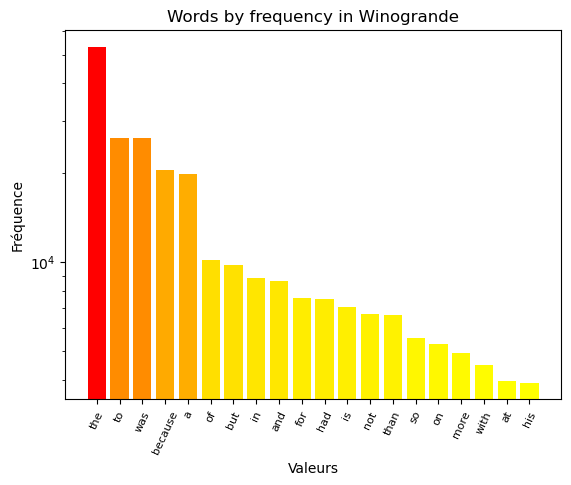

638387


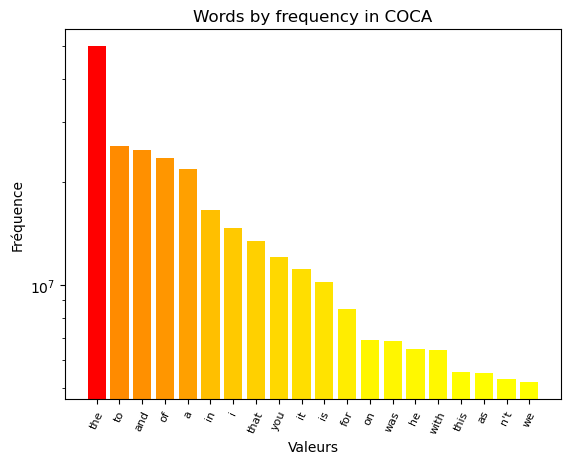

In [78]:
plot_name = "Words by frequency in Winogrande"
x1 = [row[0] for row in frequency_list_df1]
y1 = [row[1] for row in frequency_list_df1]
frequency_plot(x1[:20],y1[:20],plot_name)
print(size_frequency_list_df1)
plot_name = "Words by frequency in COCA"
x1 = [row[0] for row in frequency_list_df2]
y1 = [row[1] for row in frequency_list_df2]
frequency_plot(x1[:20],y1[:20],plot_name)

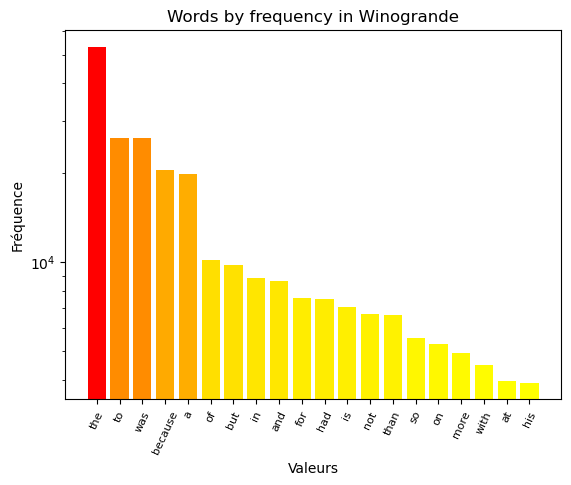

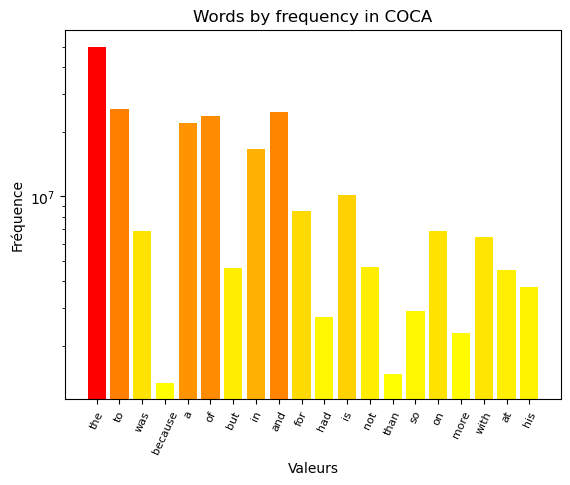

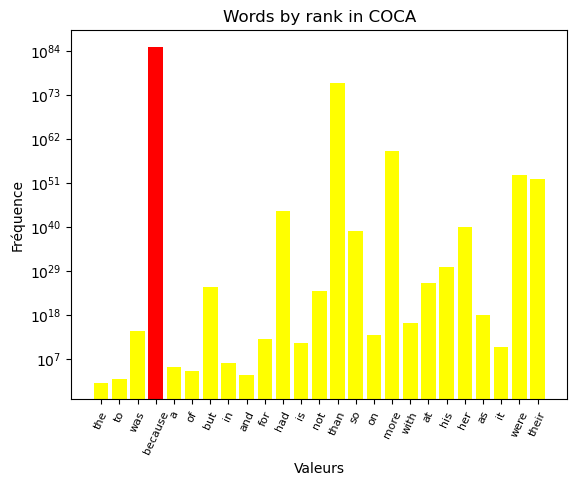

In [88]:
plot_name = "Words by frequency in Winogrande"
x1 = [row[0] for row in frequency_list_df1]
y1 = [row[1] for row in frequency_list_df1]
frequency_plot(x1[:20],y1[:20],plot_name)


plot_name = "Words by frequency in COCA"
y1 = [my_dict_coca[key] if key in my_dict_coca else 0 for key in x1  ]
frequency_plot(x1[:20],y1[:20],plot_name)

plot_name = "Words by rank in COCA"
y1 = [10**my_dict_coca2[key] if key in my_dict_coca2 else 0 for key in x1  ]
frequency_plot(x1[:25],y1[:25],plot_name)

In [111]:
# on fait la méthode du log vraissemblance :
import math

def log_likelihood(a,b,c,d):
    E1 = c*(a+b)/(c+d)
    E2 = d*(a+b)/(c+d)
    return 2*(a*math.log(a/E1) + b*math.log(b/E2))

# we calculate for each word :
def log_for_40_values(frequency_list_df1, my_dict_coca,size_frequency_list_df1, size_frequency_list_df2):
    list_likelihood = []
    i = 0
    while frequency_list_df1[i][1] >= 10:
        if frequency_list_df1[i][0] in  my_dict_coca:
            list_likelihood.append((frequency_list_df1[i][0],log_likelihood(frequency_list_df1[i][1],my_dict_coca[frequency_list_df1[i][0]],size_frequency_list_df1,size_frequency_list_df2)))
        i += 1
    return list_likelihood

list_likelihood = log_for_40_values(frequency_list_df1,my_dict_coca,size_frequency_list_df1, size_frequency_list_df2)

#print(list_likelihood)
L = sorted(list_likelihood,key = lambda x: x[1], reverse = True)
print(len(L))

2451


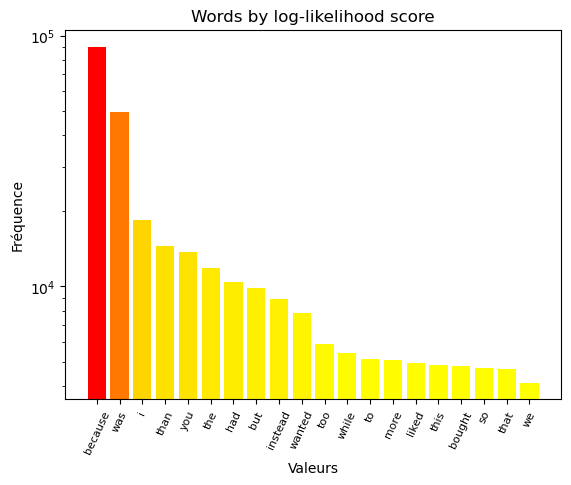

In [113]:
plot_name = "Words by log-likelihood score"
x1 = [row[0] for row in L]
y1 = [row[1] for row in L]
frequency_plot(x1[:20],y1[:20],plot_name)